In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio

In [2]:
#Sobel Img Edge Detection
def edgeImg(img):
    #gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    #gy = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
    #mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelX = cv2.Sobel(gray,cv2.CV_64F,1,0)
    sobelY = cv2.Sobel(gray,cv2.CV_64F,0,1)


    newImg = np.sqrt(np.power(sobelX,2) + np.power(sobelY,2))

    return newImg

In [3]:
#use dynamic programming to find Min Energy Path
def calculateMinEnergyPath(energyImg):
    minEnergyPath = np.zeros(energyImg.shape)
    dir = np.zeros(energyImg.shape)
    n = energyImg.shape[0]
    m = energyImg.shape[1]

    #base case on the last row of the matrix
    for j in range(0,m):
        minEnergyPath[n-1][j] = energyImg[n-1][j]

    print(minEnergyPath)

    #builds matrix from bottom up
    for i in range(n-2,-1,-1):
        for j in range(0,m):
            #print(i,j)

            #just making sure we dont go out of bounds and finding the min
            minPos = j
            center = j
            min = minEnergyPath[i+1][center]

            if(center>0 and minEnergyPath[i+1][center-1] < min):
                min = minEnergyPath[i+1][center-1]
                minPos = center -1

            if(center<m-1 and minEnergyPath[i+1][center+1] < min):
                min = minEnergyPath[i+1][center+1]
                minPos = center+1
            

            minEnergyPath[i][j] = energyImg[i][j] + min
            #dir[i][j] = minPos - center # -1, 0 ou
    return minEnergyPath


In [23]:
def printMinSeam(img,minEnergyPath):
    n = minEnergyPath.shape[0]
    m = minEnergyPath.shape[1]
    
    minPos = 0
    minVal = minEnergyPath[0][0]

    #find Min Seam
    for i in range(1,m):
        if(minEnergyPath[0][i] < minVal):
            minPos = i
            minVal = minEnergyPath[0][i]

    printImg = np.array(img)
    printImg[0][minPos] = [255,0,0]
    for i in range(1,n):
        #find min from three down
        center = minPos
        min = minEnergyPath[i][center]

        if(center>0 and minEnergyPath[i][center-1] < min):
            min = minEnergyPath[i][center-1]
            minPos = center -1

        if(center<m-1 and minEnergyPath[i][center+1] < min):
            min = minEnergyPath[i][center+1]
            minPos = center+1


        printImg[i][minPos] = [255,0,0]
    
    plt.imshow(printImg)
    plt.show()
    return

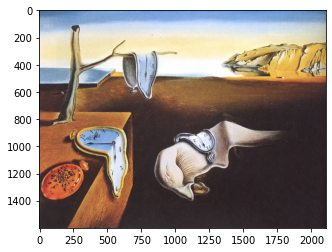

In [5]:
#img = imageio.imread('imgs/Broadway_tower_edit.jpg')
img = imageio.imread('imgs/PersistenceOfMemory.jpg')

plt.imshow(img)
plt.show()

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 354. 104. ...   6.   2.   0.]]


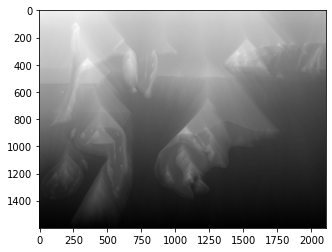

In [6]:
edge = edgeImg(img)

minEnergyPath = calculateMinEnergyPath(edge)

plt.imshow(minEnergyPath,cmap="gray")
plt.show()

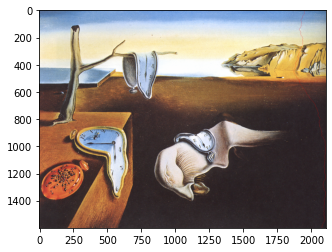

In [24]:
printMinSeam(img,minEnergyPath)

(1600, 2105, 3)

(1600, 1704, 3)
(1600, 1704)


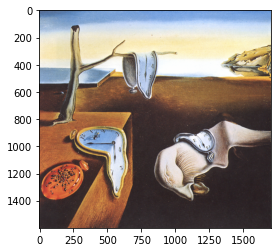

In [31]:
def removeSeam(img,minEnergyPath):
    n = minEnergyPath.shape[0]
    m = minEnergyPath.shape[1]
    
    minPos = 0
    minVal = minEnergyPath[0][0]

    #find Min Seam
    for i in range(1,m):
        if(minEnergyPath[0][i] < minVal):
            minPos = i
            minVal = minEnergyPath[0][i]

    newImg = np.zeros((img.shape[0],img.shape[1]-1,img.shape[2]),dtype=np.uint8)
    newMinEnergyPath = np.zeros((minEnergyPath.shape[0],minEnergyPath.shape[1]-1),dtype=np.float64)

    newImg[0] = np.concatenate((img[0][0:minPos],img[0][minPos+1:img.shape[1]]))
    newMinEnergyPath[0] = np.concatenate((minEnergyPath[0][0:minPos],minEnergyPath[0][minPos+1:minEnergyPath.shape[1]]))
    for i in range(1,n):
        #find min from three down
        center = minPos
        min = minEnergyPath[i][center]

        if(center>0 and minEnergyPath[i][center-1] < min):
            min = minEnergyPath[i][center-1]
            minPos = center -1

        if(center<m-1 and minEnergyPath[i][center+1] < min):
            min = minEnergyPath[i][center+1]
            minPos = center+1

        newImg[i] = np.concatenate((img[i][0:minPos],img[i][minPos+1:img.shape[1]]))
        newMinEnergyPath[i] = np.concatenate((minEnergyPath[i][0:minPos],minEnergyPath[i][minPos+1:minEnergyPath.shape[1]]))
        #printImg[i][minPos] = [255,255,255]
    
    return newImg,newMinEnergyPath

def removeNSeams(img,minEnergyPath,seamNumber):
    newImg = img
    newEP = minEnergyPath
    for i in range(0,seamNumber):
        newImg, newEP = removeSeam(newImg,newEP)

    return newImg, newEP

print(img.shape)
print()

newImg, newEP = removeNSeams(newImg,newEP,400)

print(newImg.shape)
print(newEP.shape)

plt.imshow(newImg)
plt.show()